In [1]:
from src.drugexr.scoring import ra_scorer
from src.drugexr.config import constants
from tqdm import tqdm
from typing import List, Optional

import pandas as pd

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True
from rdkit.Chem import MolFromSmiles

In [2]:
df = pd.read_table(filepath_or_buffer=constants.MODEL_PATH / "output/benchmark/PRE-TRAIN_REG_OBJ1.tsv")

In [3]:
sampled_smiles = df.Smiles.to_list()

In [15]:
# Using NN-based RA Score
def safe_ra_score(smiles: List[str], use_xgb_model: bool = False) -> List[Optional[float]]:
    ra_scores = []
    invalid = 0
    tqdm_name = "xgb" if use_xgb_model else "nn"
    for smi in tqdm(sampled_smiles, desc=tqdm_name):
        try:
            ra_scores.append(ra_scorer.calculate_score(mol=smi, use_xgb_model=use_xgb_model))
        except Exception as e:
            invalid += 1
            ra_scores.append(None)
    print(f"% invalid smiles: {(invalid / len(sampled_smiles)) * 100}%")            
    return ra_scores

In [16]:
df["RA_score_NN"] = safe_ra_score(smiles=sampled_smiles)
df["RA_score_XGB"] = safe_ra_score(smiles=sampled_smiles, use_xgb_model=True)

nn: 100%|██████████████████████████████████████████████████████████████████████████| 1000/1000 [04:15<00:00,  3.91it/s]


% invalid smiles: 5.2%


xgb: 100%|█████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.72it/s]

% invalid smiles: 5.2%


In [17]:
ra_score_dist_xgb = df.dropna().RA_score_XGB
ra_score_dist_nn = df.dropna().RA_score_NN
# ra_score_dist = ra_score_dist.to_numpy()

<AxesSubplot:ylabel='Frequency'>

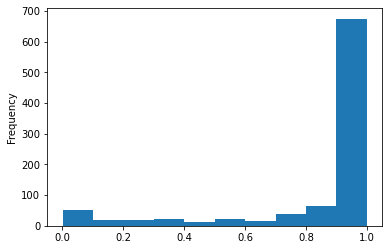

In [22]:
ra_score_dist_xgb.plot.hist()

<AxesSubplot:ylabel='Frequency'>

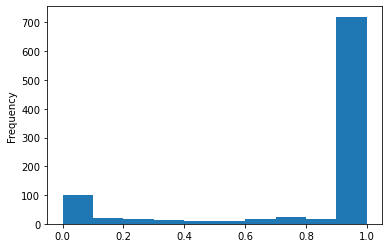

In [23]:
ra_score_dist_nn.plot.hist()

In [ ]:
df.Smiles[0]

In [ ]:
import rdkit

In [ ]:
mol = MolFromSmiles(df.Smiles[995])

In [ ]:
mol